In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv')


In [6]:

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.to_csv('social_network_ads.csv')

In [10]:
df.shape

(400, 5)

In [11]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
## Drop UserId

df.drop(['User ID'], axis=1,inplace=True)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [15]:
df_model = df.copy()

### Prepare the dataset for machine learning

In [16]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [17]:
# Change Gender into numerical variables

df_model['Gender'] = df_model["Gender"].astype('category').cat.codes

In [18]:
df_model.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Set feature and target 


In [19]:
# X = features
# Y = target

X = df_model.iloc[:,:-1]
Y = df_model.iloc[:,-1]

In [20]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [21]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [24]:
x_train.shape,y_train.shape 

((280, 3), (280,))

In [25]:
x_test.shape, y_test.shape

((120, 3), (120,))

### Feature Scaling

>> Since KNN is a distance based algorithm

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### Fitting the KNN model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predictions and Evaluations

In [36]:
y_pred = knn.predict(x_test_scaled)

In [40]:
from sklearn.metrics import classification_report, accuracy_score

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        80
           1       0.82      0.90      0.86        40

    accuracy                           0.90       120
   macro avg       0.88      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



In [39]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Purchased,,
0,72,8
1,4,36


In [42]:
accuracy_score(y_test,y_pred)

0.9

### The Accuracy of the model is 90%

### Finding best K value based on Accuracy score 

In [43]:
ks = np.linspace(1,30,dtype='int64')

In [46]:
acc = []

for k in ks:
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(x_train_scaled,y_train)
    pred = kn.predict(x_test_scaled)
    
    a = accuracy_score(y_test,pred)
    acc.append(a)


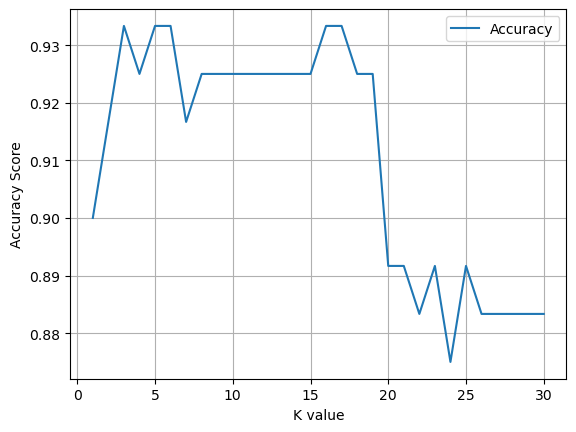

In [47]:
plt.style.use('default')
plt.plot(ks,acc, label='Accuracy')
plt.ylabel('Accuracy Score', size=10)
plt.xlabel('K value', size=10)
plt.legend()
plt.grid()

From the above graph, you can see that the accuracy is above 93% for k value equal to 5

In [48]:
## Lets train the model with K value equal to 5

bestk = KNeighborsClassifier(n_neighbors=5)
bestk.fit(x_train_scaled,y_train)
best_pred = bestk.predict(x_test_scaled)

In [49]:
accuracy_score(y_test,best_pred)

0.9333333333333333

In [50]:
print(classification_report(y_test,best_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        80
           1       0.86      0.95      0.90        40

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



### The accuracy of the knn model is 93%

In [51]:
pd.crosstab(y_test,best_pred)

col_0,0,1
Purchased,,
0,74,6
1,2,38


# Let's Try Support Vector Machines and see the accuracy score

In [52]:
from sklearn.svm import SVC

## Train the model 

In [53]:
svc_model = SVC()

In [54]:
svc_model.fit(x_train_scaled,y_train)

SVC()

## Testing and Evaluations



In [55]:
svc_pred = svc_model.predict(x_test_scaled)

In [56]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        80
           1       0.83      0.95      0.88        40

    accuracy                           0.92       120
   macro avg       0.90      0.93      0.91       120
weighted avg       0.92      0.92      0.92       120



In [57]:
accuracy_score(y_test,svc_pred)

0.9166666666666666

In [67]:
pd.crosstab(y_test,svc_pred)

col_0,0,1
Purchased,,
0,72,8
1,2,38


### Lets try to improve the SVC model

## GridSearchCV

In [58]:
param_grid =  {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)

In [61]:
## Retrain the model

grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.911 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)


### Predictions and Evaluations

In [62]:
grid_pred = grid.predict(x_test_scaled)

In [63]:
## lets check best score and best estimator
grid.best_estimator_

SVC(C=1, gamma=1)

In [64]:
grid.best_score_

0.9071428571428571

In [65]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        80
           1       0.85      0.97      0.91        40

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [66]:
pd.crosstab(y_test,grid_pred)

col_0,0,1
Purchased,,
0,73,7
1,1,39
